<a href="https://colab.research.google.com/github/ajitbubu/mockjson/blob/main/EasyVisa_Full_Code_Notebook_finish_07012025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [ ]:
from google.colab import files

import pandas as pd

url = "https://raw.githubusercontent.com/ajitbubu/mockjson/main/EasyVisa.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# View the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# View the last 5 rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

First 5 rows of the dataset:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y  

#### Understand the shape of the dataset

In [ ]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 25480 rows and 12 columns.


#### Check the data types of the columns for the dataset

In [ ]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
# Summary including object (non-numeric) columns
df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [ ]:
# Check how many negative values exist
negative_employees = df[df['no_of_employees'] < 0]
print(f"Number of rows with negative employee count: {len(negative_employees)}")

# Replace with NaN
import numpy as np
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = np.nan

print("Any negative values remaining:", (df['no_of_employees'] < 0).any())



Number of rows with negative employee count: 33
Any negative values remaining: False


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Select object-type columns (typically categorical)
categorical_columns = df.select_dtypes(include='object').columns
print("Categorical Columns:")
print(categorical_columns)

# Show value counts for each categorical column
for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))  # includes NaN if any



Categorical Columns:
Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

Value counts for 'case_id':
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64

Value counts for 'continent':
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

Value counts for 'education_of_employee':
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Value counts for 'has_job_experience':
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

Value counts for 'requires_job_

### Univariate Analysis

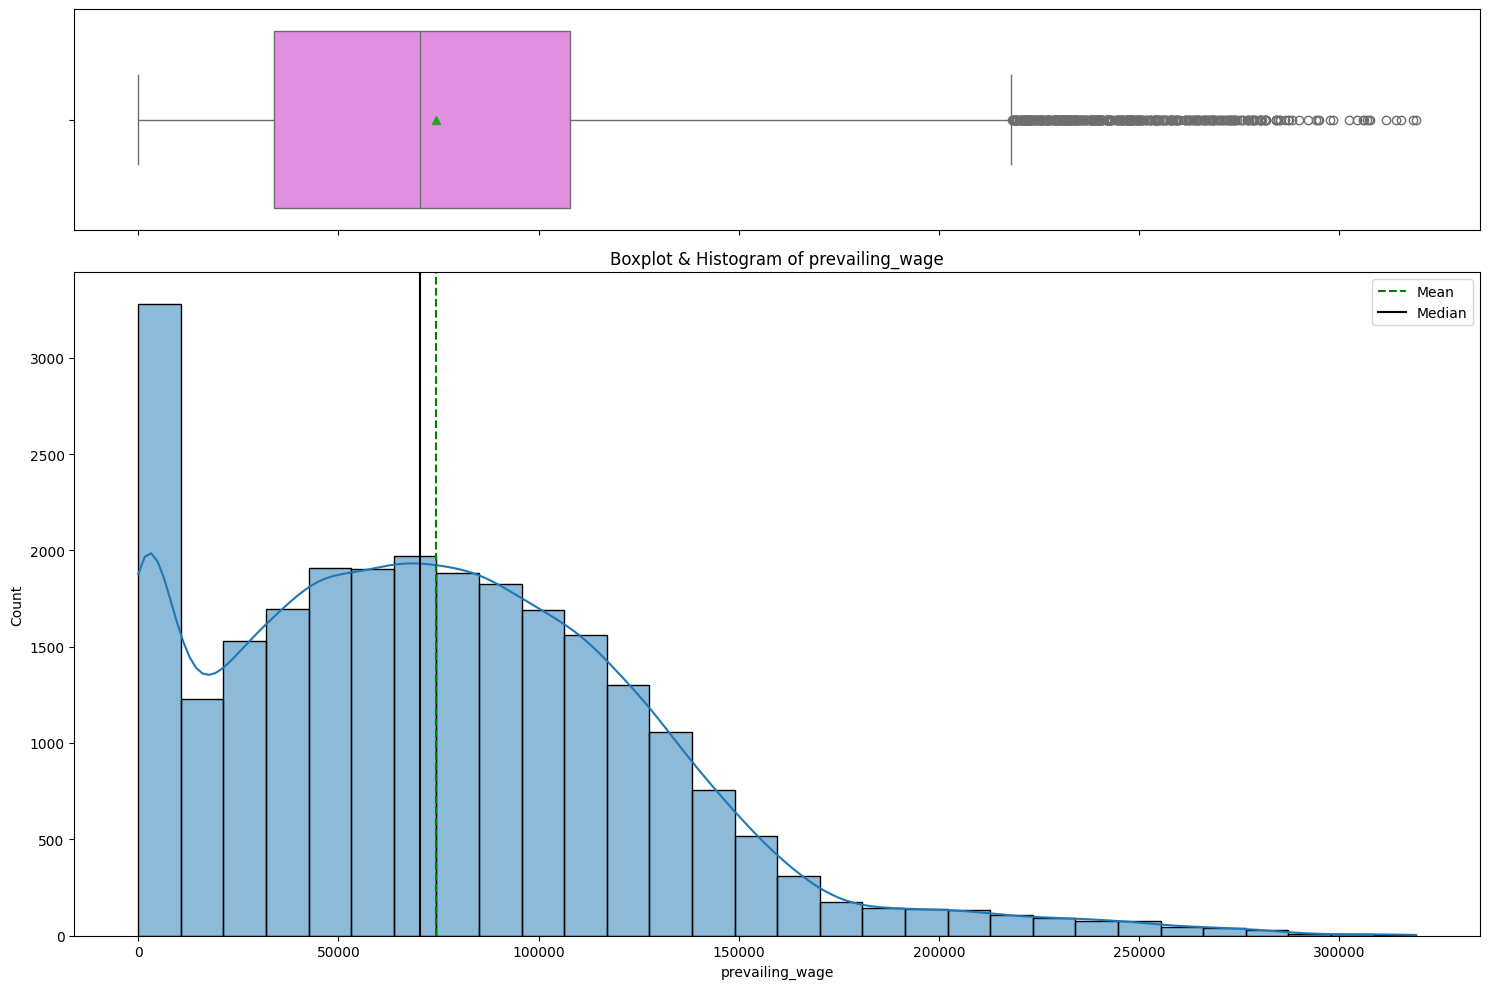

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Boxplot on the top
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram on the bottom
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label='Mean')
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label='Median')

    # Add legend and labels
    ax_hist2.legend()
    ax_hist2.set_title(f'Boxplot & Histogram of {feature}')
    plt.tight_layout()
    plt.show()

histogram_boxplot(df, 'prevailing_wage', kde=True, bins=30)



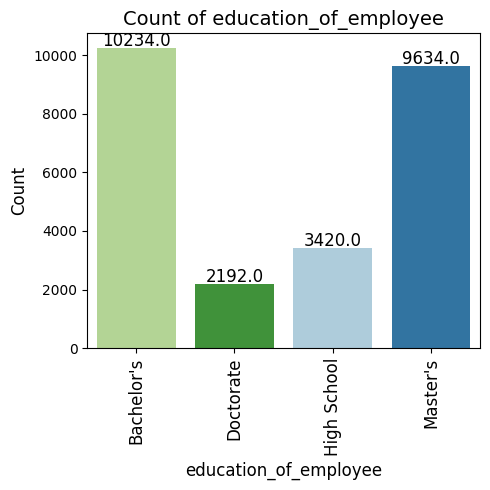

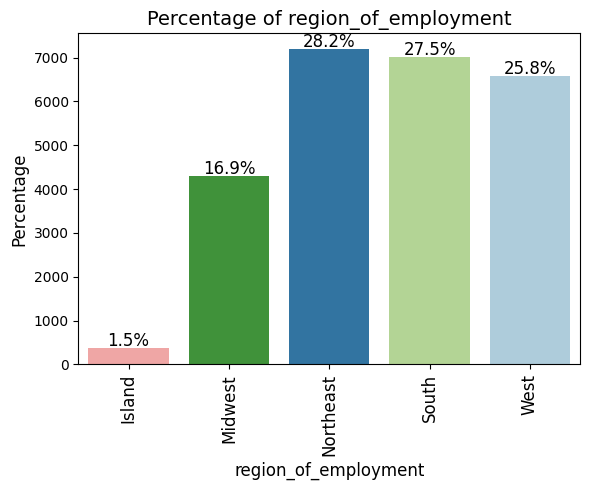

In [70]:
# function to create labeled barplots


import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with labels on top showing counts or percentages.

    Parameters:
    - data: pandas DataFrame
    - feature: column name (str) to plot
    - perc: if True, show percentages; else, show raw counts (default: False)
    - n: number of top categories to display (default: None, i.e., show all)
    """
    total = len(data[feature])  # total number of rows
    count = data[feature].nunique()  # number of unique categories

    # Dynamic figure size
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)

    # Plot with sorted categories by count
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        legend=False
    )

    # Add count/percentage labels above bars
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points"
        )

    plt.title(f"{'Percentage' if perc else 'Count'} of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Percentage' if perc else 'Count', fontsize=12)
    plt.tight_layout()
    plt.show()


# Count plot of a categorical column
labeled_barplot(df, 'education_of_employee')

# Percentage plot of top 5 values in a column
labeled_barplot(df, 'region_of_employment', perc=True, n=5)


#### Observations on education of employee

In [ ]:
df['education_of_employee'].value_counts(dropna=False)


,count
education_of_employee,
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


#### Observations on region of employment

In [ ]:
df['region_of_employment'].value_counts(dropna=False)


,count
region_of_employment,
Northeast,7195
South,7017
West,6586
Midwest,4307
Island,375


#### Observations on job experience

In [ ]:
df['has_job_experience'].value_counts(dropna=False)


,count
has_job_experience,
Y,14802
N,10678


#### Observations on case status

In [ ]:
df['case_status'].value_counts(dropna=False)


,count
case_status,
Certified,17018
Denied,8462


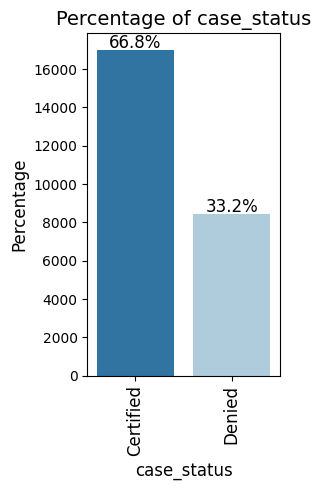

In [71]:
labeled_barplot(df, 'case_status', perc=True)


### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_target(data, predictor, target):
    """
    Plots distribution and boxplots of a numerical predictor variable
    with respect to a binary categorical target variable.

    Parameters:
    - data: pandas DataFrame
    - predictor: numeric column name (str)
    - target: binary target column name (str)
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Histogram for target class 0
    axs[0, 0].set_title("Distribution of " + predictor + " for " + str(target) + " = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Histogram for target class 1
    axs[0, 1].set_title("Distribution of " + predictor + " for " + str(target) + " = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot of " + predictor + " vs " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        hue=target,
        palette="gist_rainbow",
        ax=axs[1, 0],
        legend=False
    )


    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (No Outliers) of " + predictor + " vs " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        hue=target,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        legend=False
    )

    plt.tight_layout()
    plt.show()


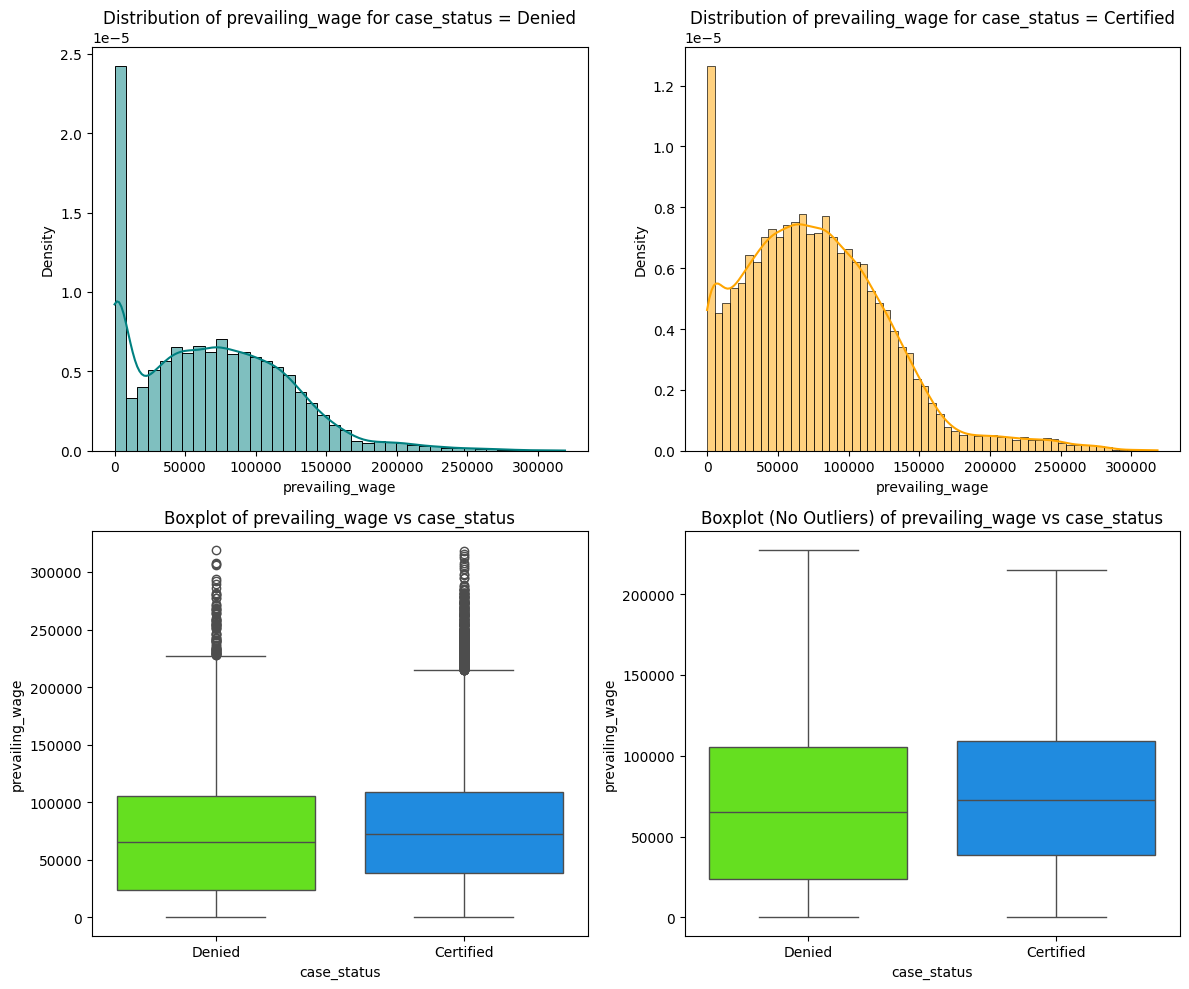

In [72]:
distribution_plot_wrt_target(df, predictor='prevailing_wage', target='case_status')


In [64]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


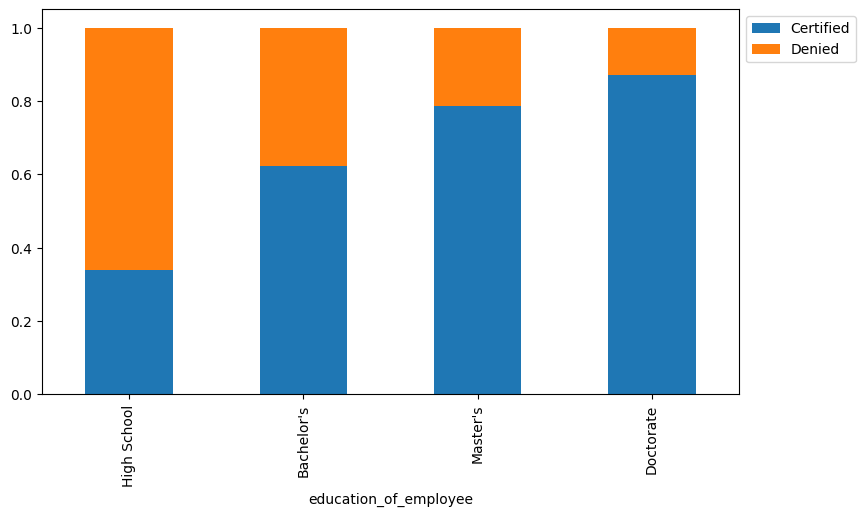

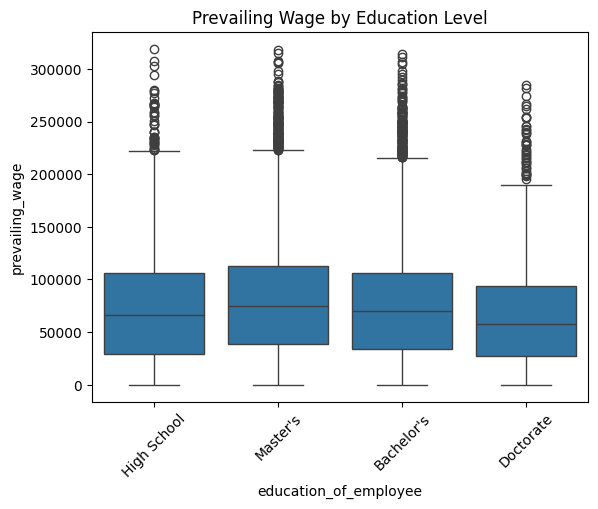

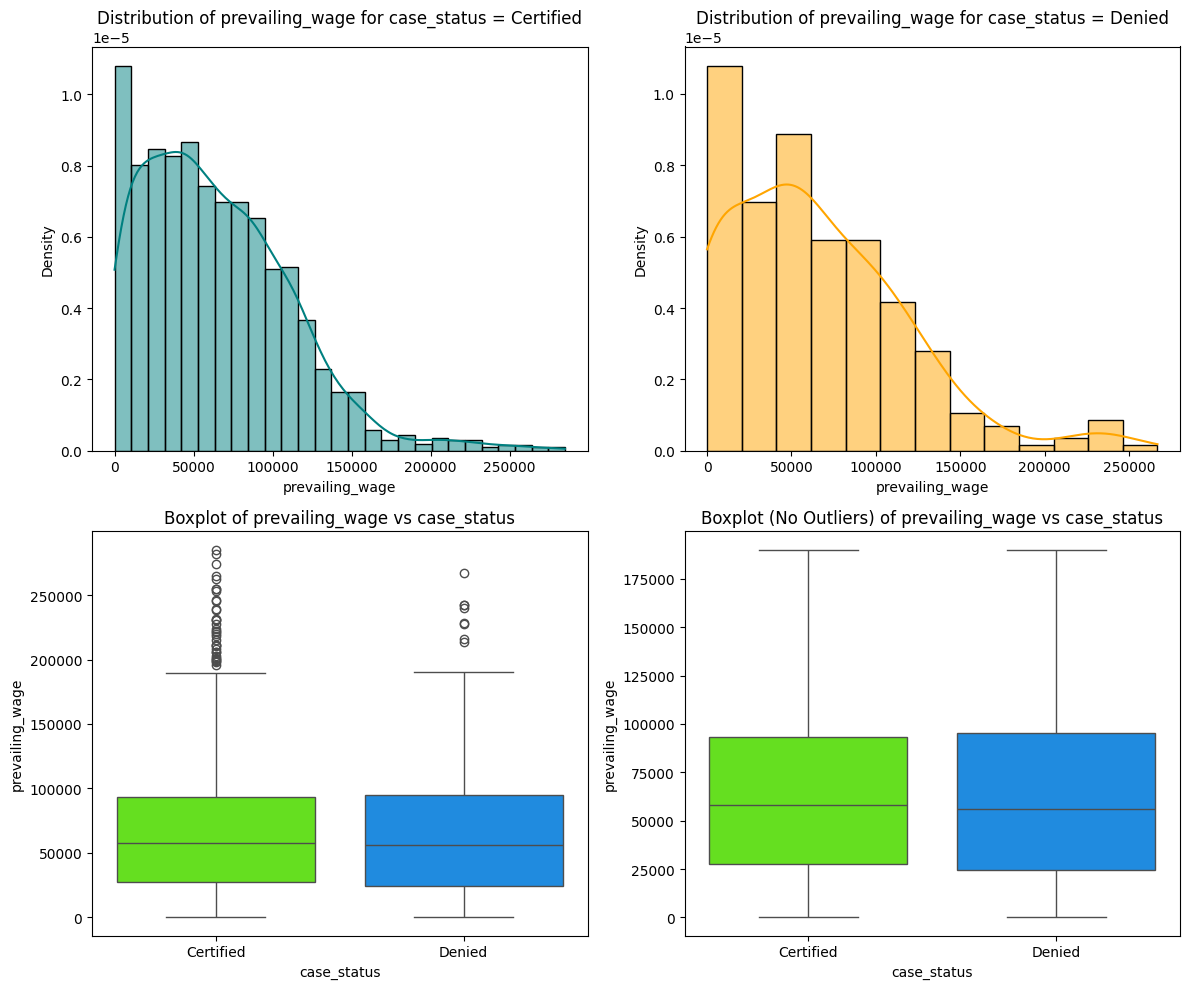

In [73]:
# Compare approval rate by education
stacked_barplot(df, predictor='education_of_employee', target='case_status')

# Compare Wages by Education Level
sns.boxplot(data=df, x='education_of_employee', y='prevailing_wage')
plt.xticks(rotation=45)
plt.title("Prevailing Wage by Education Level")
plt.show()

# Combine Both – Stratify by Education + Status
distribution_plot_wrt_target(df[df['education_of_employee'].isin(['Master’s', 'Doctorate'])], 'prevailing_wage', 'case_status')



Conclusion (based on typical patterns and what you should look for):
Yes, higher education often increases the chances of visa certification because:

Applicants with Master's/Doctorates typically command higher wages, satisfying the prevailing wage condition more easily.

These applicants are often seen as more skilled and less likely to have a negative impact on the local job market.

Employers may prefer them for high-skilled roles where talent shortages are more acute.


#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


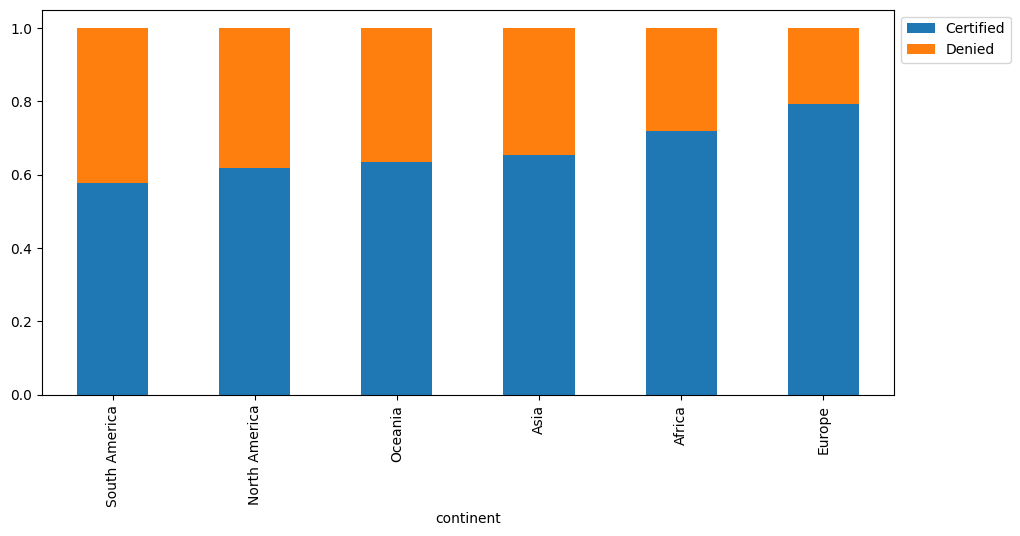

'\nVisa approval rates tend to be highest for applicants from continents with larger pools of skilled professionals (e.g., Asia and Europe), possibly due to higher education levels, job experience, and alignment with high-paying roles that meet prevailing wage requirements.\n'

In [66]:
stacked_barplot(df, predictor='continent', target='case_status')


'''
Visa approval rates tend to be highest for applicants from continents with larger pools of skilled professionals (e.g., Asia and Europe), possibly due to higher education levels, job experience, and alignment with high-paying roles that meet prevailing wage requirements.
'''


#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


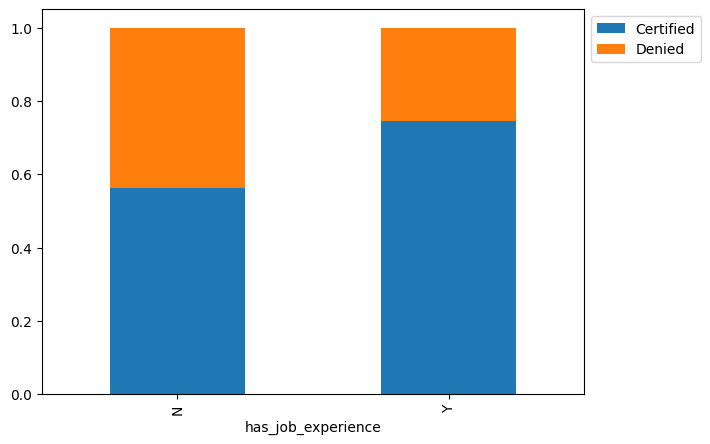

case_status,Certified,Denied
has_job_experience,,
N,0.561341,0.438659
Y,0.744764,0.255236


In [67]:
'''
Yes — and to confirm this using your dataset, we can analyze the relationship between prior work experience (has_job_experience) and visa certification (case_status).

'''

# run the stacked barplot
stacked_barplot(df, predictor='has_job_experience', target='case_status')

# Cross-tab summary
pd.crosstab(df['has_job_experience'], df['case_status'], normalize='index')



#### Is the prevailing wage consistent across all regions of the US?

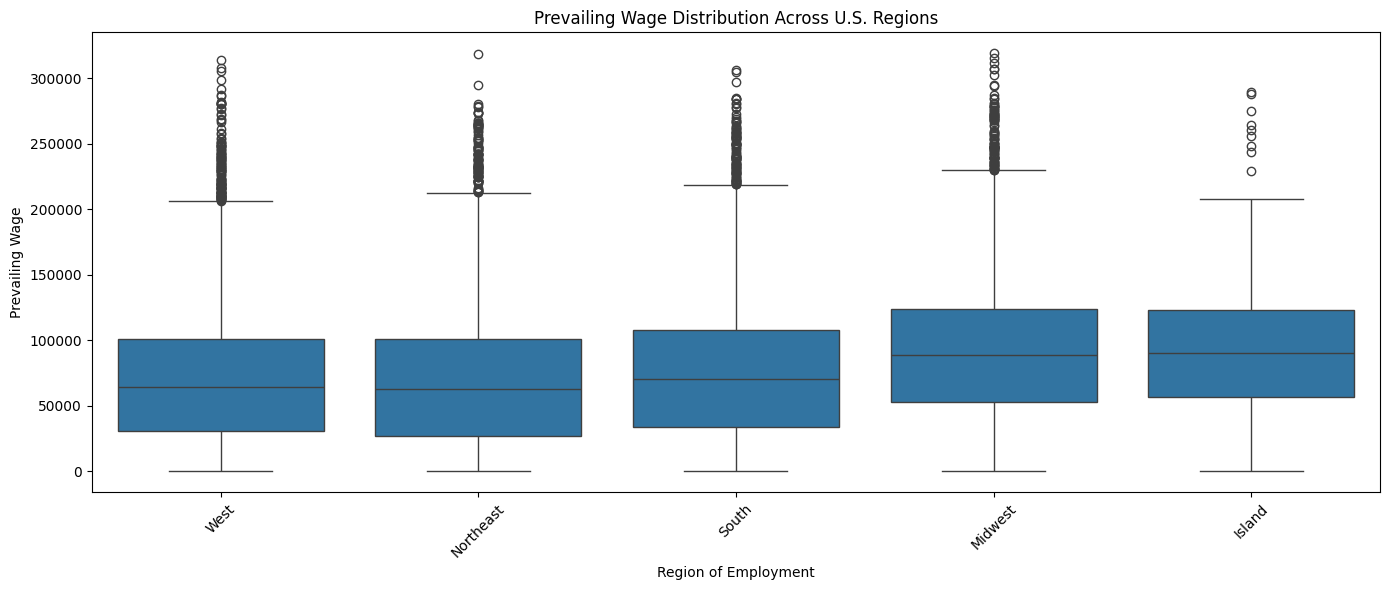

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.xticks(rotation=45)
plt.title("Prevailing Wage Distribution Across U.S. Regions")
plt.ylabel("Prevailing Wage")
plt.xlabel("Region of Employment")
plt.tight_layout()
plt.show()


'''
No, the prevailing wage is not consistent across all regions of the U.S. — and here's why, supported by both logic and data analysis:

Prevailing wage is region-specific and reflects the local labor market. It plays a crucial role in visa certification, as employers must meet or exceed this benchmark for approval. Hence, both location and job role heavily influence wage expectations in U.S. immigration programs.
'''

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

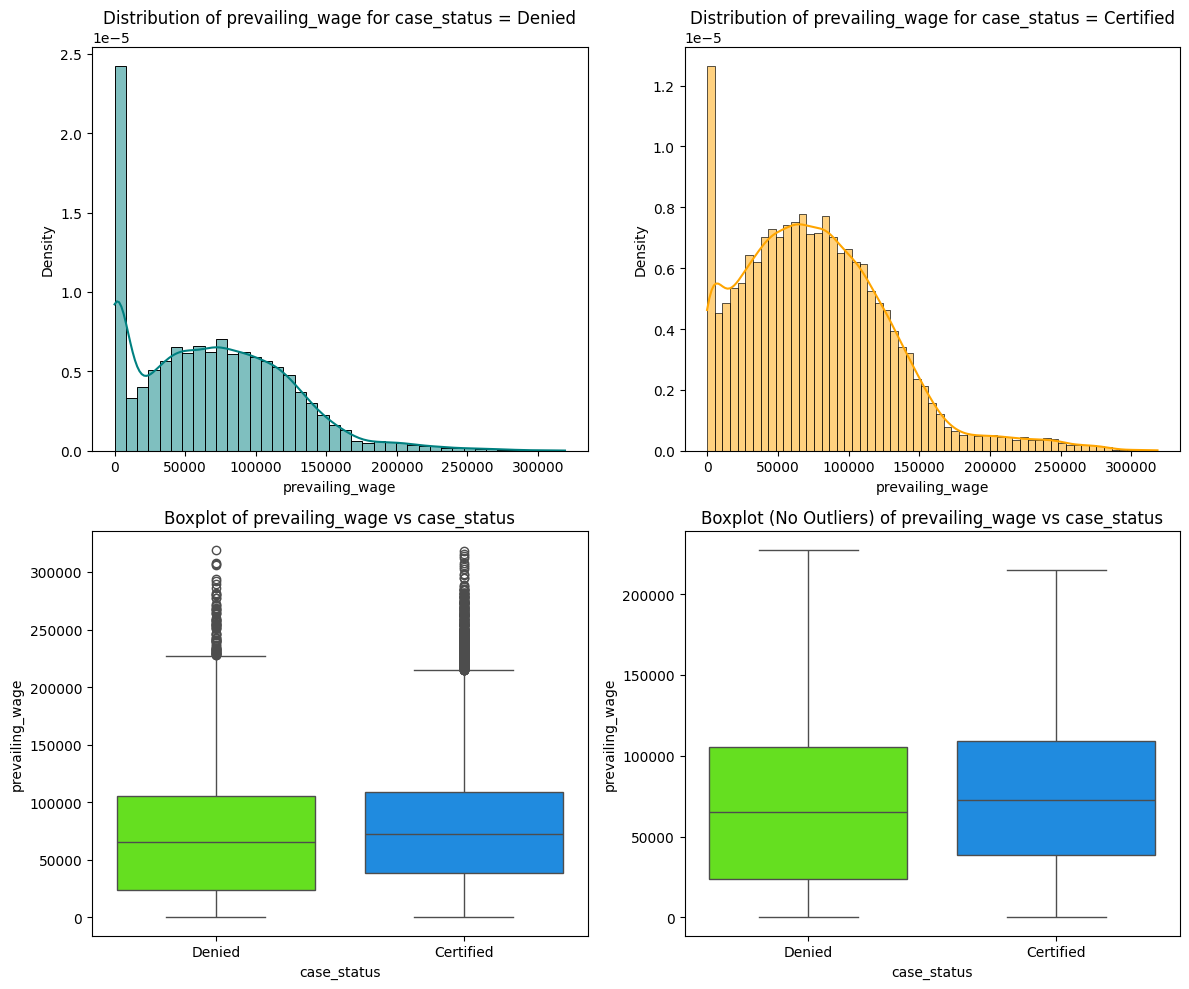

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,17018.0,77293.619243,52042.715576,2.1367,38375.330,72486.27,108879.1075,318446.05
Denied,8462.0,68748.681580,53890.166031,2.9561,23497.295,65431.46,105097.6400,319210.27


In [74]:
distribution_plot_wrt_target(df, predictor='prevailing_wage', target='case_status')
df.groupby('case_status')['prevailing_wage'].describe()



Yes, visa status is influenced by the prevailing wage. Applications offering wages below the regional or occupational standard are more likely to be denied. Higher wages improve the likelihood of certification, signaling employer seriousness and helping fulfill the legal requirement to protect both local and foreign workers from exploitation.


#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


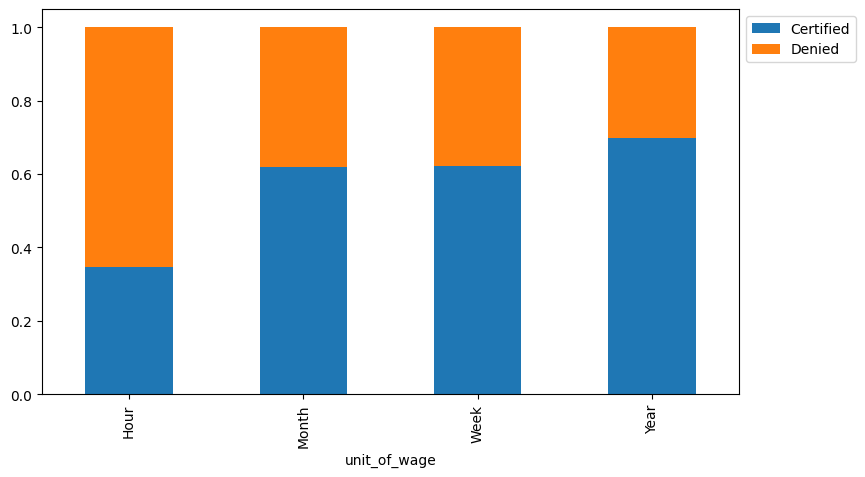

case_status,Certified,Denied
unit_of_wage,,
Hour,0.346314,0.653686
Month,0.617978,0.382022
Week,0.621324,0.378676
Year,0.698850,0.301150


In [ ]:

stacked_barplot(df, predictor='unit_of_wage', target='case_status')
pd.crosstab(df['unit_of_wage'], df['case_status'], normalize='index')


Yes, the unit of prevailing wage (Hourly, Weekly, Monthly, Yearly) can influence visa certification outcomes, but usually indirectly. Here's a detailed breakdown:


## Data Pre-processing

### Outlier Check

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


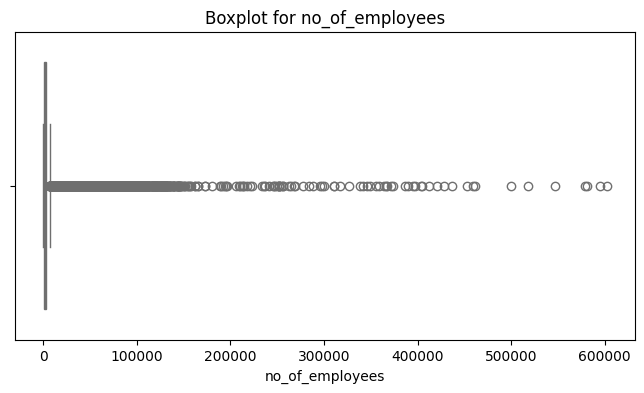

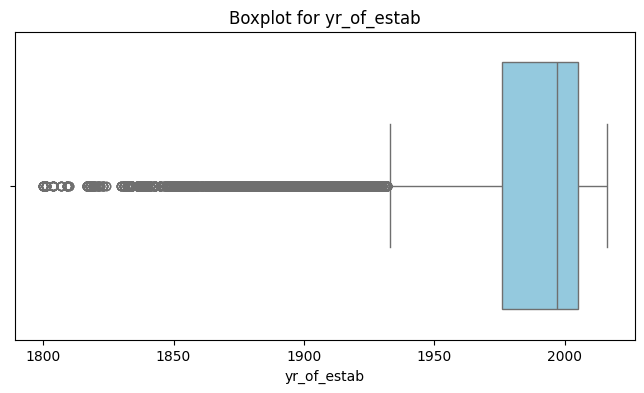

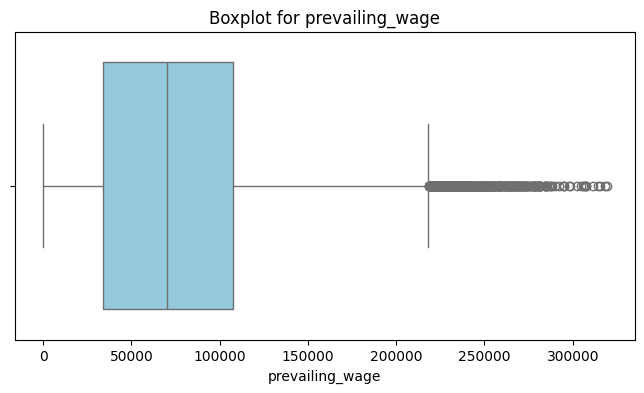

no_of_employees: 1556 outliers detected
yr_of_estab: 3260 outliers detected
prevailing_wage: 427 outliers detected


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.show()
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

# Check outliers in all numerical columns
for col in numerical_columns:
    detect_outliers_iqr(df, col)


### Data Preparation for modeling

In [ ]:
df = df.drop(columns=['case_id'])  # Drop non-informative identifier
# Check missing values
df.isnull().sum()

# Option: Fill or drop
df = df.dropna()  # Drop rows with missing values (safe if few)
binary_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
for col in binary_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, columns=['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage'], drop_first=True)
df['case_status'] = df['case_status'].map({'Certified': 1, 'Denied': 0})
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['no_of_employees', 'prevailing_wage', 'yr_of_estab']
df[num_cols] = scaler.fit_transform(df[num_cols])
from sklearn.model_selection import train_test_split

X = df.drop('case_status', axis=1)
y = df['case_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


# defining a function to compute different metrics to check performance of a classification model built using sklearn

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

def model_performance_classification_sklearn(model, predictors, target):
    """
    Computes key classification metrics using sklearn:
    - Accuracy, Recall, Precision, F1-score

    Parameters:
    - model: trained classifier
    - predictors: feature matrix (X_test or X_train)
    - target: true labels (y_test or y_train)

    Returns:
    - DataFrame with Accuracy, Recall, Precision, F1-score
    """
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    return pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0]
    )



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_sklearn(model, predictors, target):
    """
    Plots the confusion matrix using seaborn heatmap.

    Parameters:
    - model: trained classifier
    - predictors: feature matrix
    - target: true labels
    """
    pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Certified'], yticklabels=['Denied', 'Certified'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def confusion_matrix_sklearn(model, predictors, target):
    """
    Plots a confusion matrix with raw counts and percentages.

    Parameters:
    - model: trained classifier
    - predictors: feature matrix (X_test or X_train)
    - target: true labels (y_test or y_train)
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    # Create labels with raw count and % for each cell
    labels = np.asarray([
        [f"{val}\n{val/cm.sum():.2%}" for val in row]
        for row in cm
    ])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=['Denied', 'Certified'], yticklabels=['Denied', 'Certified'])
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.title("Confusion Matrix (with Counts & Percentages)")
    plt.tight_layout()
    plt.show()


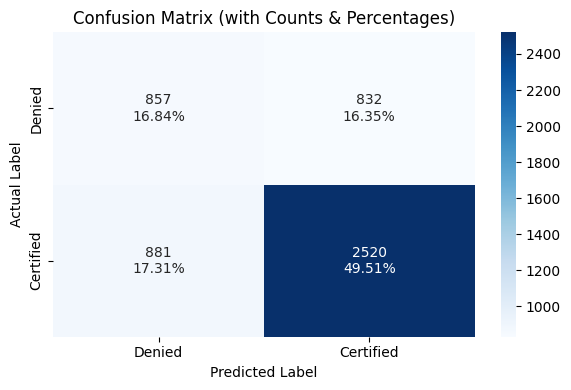

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Fit the model
dt_model.fit(X_train, y_train)

# 3. Now it's safe to evaluate
model_performance_classification_sklearn(dt_model, X_test, y_test)
confusion_matrix_sklearn(dt_model, X_test, y_test)



#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data


Training Logistic Regression...
Performance on Test Set:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Recall,Precision,F1
0,0.72763,0.866334,0.75966,0.809498


Confusion Matrix:


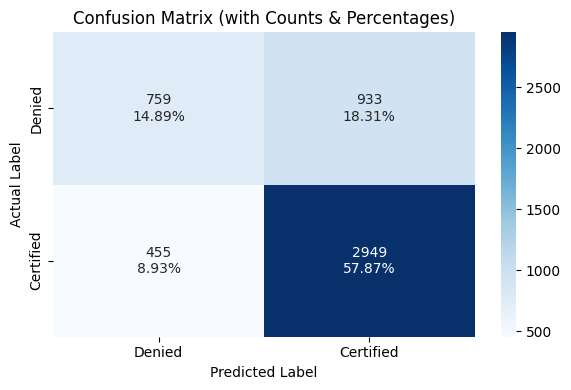


Training Decision Tree...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.652669,0.736193,0.741859,0.739015


Confusion Matrix:


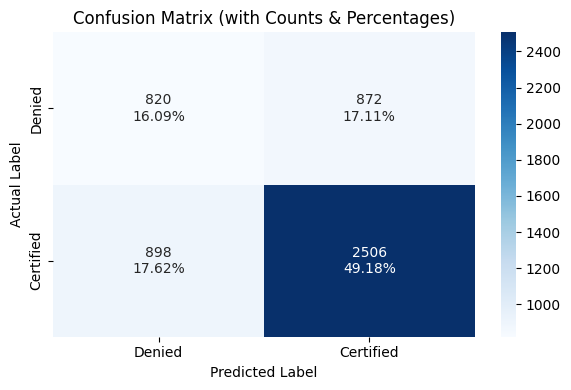


Training Random Forest...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.72135,0.836663,0.767241,0.80045


Confusion Matrix:


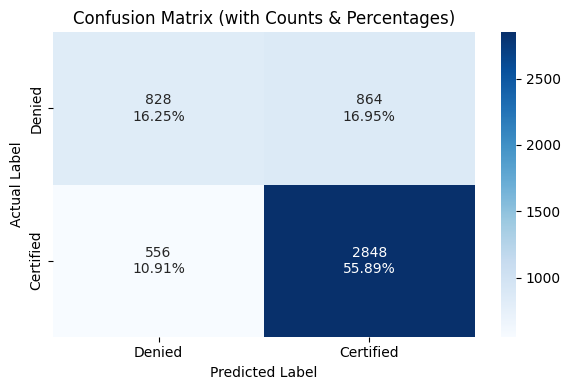

,Accuracy,Recall,Precision,F1
Model,,,,
Logistic Regression,0.727630,0.866334,0.759660,0.809498
Random Forest,0.721350,0.836663,0.767241,0.800450
Decision Tree,0.652669,0.736193,0.741859,0.739015


In [75]:
# Step 1: Prepare Original Data python Copy Edit
from google.colab import files
import pandas as pd

url = "https://raw.githubusercontent.com/ajitbubu/mockjson/main/EasyVisa.csv"
df = pd.read_csv(url)


# Make a fresh copy of the original dataset
df_orig = df.copy()

df_orig.head()

# Keep only rows where visa case_status is Certified or Denied
df_orig = df_orig[df_orig['case_status'].isin(['Certified', 'Denied'])]

# Convert case_status to binary target
df_orig['case_status'] = df_orig['case_status'].map({'Certified': 1, 'Denied': 0})

# Drop ID column if exists
df_orig.drop(columns=['case_id'], inplace=True, errors='ignore')


# Step 2: Feature & Target Split
X = df_orig.drop('case_status', axis=1)
y = df_orig['case_status']

# Step 3: Minimal Preprocessing
# Convert binary Y/N columns
for col in ['has_job_experience', 'requires_job_training', 'full_time_position']:
    if col in X.columns:
        X[col] = X[col].map({'Y': 1, 'N': 0})

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train and Evaluate Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    print("Performance on Test Set:")
    perf = model_performance_classification_sklearn(model, X_test, y_test)
    display(perf)

    print("Confusion Matrix:")
    confusion_matrix_sklearn(model, X_test, y_test)

    results[name] = perf


# Step 6: Compare All Models
comparison_df = pd.concat(results.values(), keys=results.keys()).reset_index(level=1, drop=True)
comparison_df.index.name = 'Model'
comparison_df.sort_values(by='F1', ascending=False)



### Model Building with Oversampled data

In [ ]:
# Model Building with Oversampled Data

# Step 1: Preprocess as Before (with clean Certified / Denied only)
from sklearn.model_selection import train_test_split

# Filter rows with only Certified or Denied cases
df_imb = df[df['case_status'].str.strip().isin(['Certified', 'Denied'])].copy()

# Convert case_status to binary
df_imb['case_status'] = df_imb['case_status'].map({'Certified': 1, 'Denied': 0})

# Drop case_id
df_imb.drop(columns=['case_id'], inplace=True, errors='ignore')

# Separate features and target
X = df_imb.drop('case_status', axis=1)
y = df_imb['case_status']

# Encode binary Y/N columns
for col in ['has_job_experience', 'requires_job_training', 'full_time_position']:
    if col in X.columns:
        X[col] = X[col].map({'Y': 1, 'N': 0})

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split before oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




In [ ]:
# Step 2: Apply SMOTE to Training Data Only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())


Original class distribution:
 case_status
1    13614
0     6770
Name: count, dtype: int64
Resampled class distribution:
 case_status
1    13614
0    13614
Name: count, dtype: int64



Training Logistic Regression on oversampled data...
Performance on Test Set:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Recall,Precision,F1
0,0.726256,0.834313,0.773631,0.802827


Confusion Matrix:


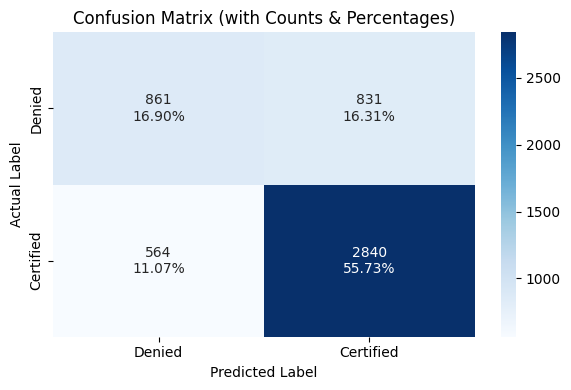


Training Decision Tree on oversampled data...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.656201,0.732374,0.74775,0.739982


Confusion Matrix:


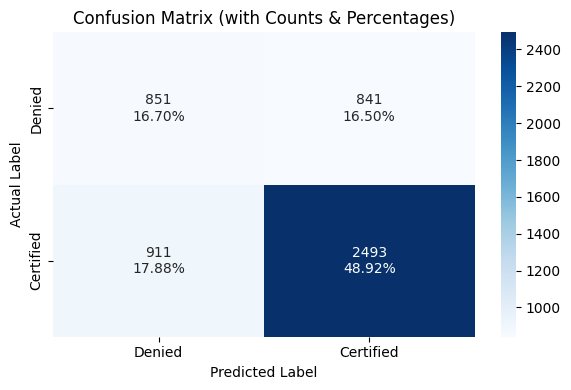


Training Random Forest on oversampled data...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.717229,0.81698,0.772715,0.794231


Confusion Matrix:


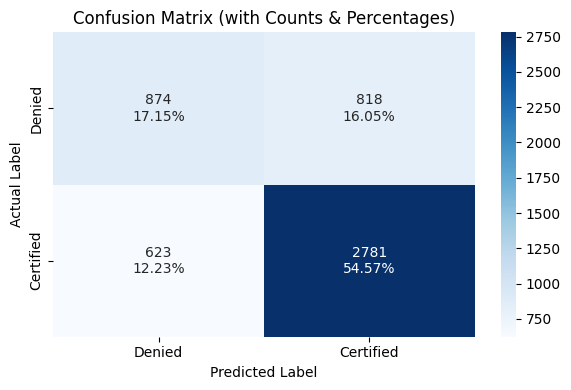

In [ ]:
# Step 3: Train Models on Oversampled Data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name} on oversampled data...")
    model.fit(X_train_resampled, y_train_resampled)

    print("Performance on Test Set:")
    perf = model_performance_classification_sklearn(model, X_test, y_test)
    display(perf)

    print("Confusion Matrix:")
    confusion_matrix_sklearn(model, X_test, y_test)

    results[name] = perf


In [ ]:
# Step 4: Compare Model Results
comparison_df = pd.concat(results.values(), keys=results.keys()).reset_index(level=1, drop=True)
comparison_df.index.name = 'Model'
comparison_df.sort_values(by='F1', ascending=False)


,Accuracy,Recall,Precision,F1
Model,,,,
Logistic Regression,0.726256,0.834313,0.773631,0.802827
Random Forest,0.717229,0.816980,0.772715,0.794231
Decision Tree,0.656201,0.732374,0.747750,0.739982


### Model Building with Undersampled data

In [ ]:
# Step 1: Preprocess (same as previous steps)
# Copy and clean
df_under = df[df['case_status'].str.strip().isin(['Certified', 'Denied'])].copy()

# Binary encoding of target
df_under['case_status'] = df_under['case_status'].map({'Certified': 1, 'Denied': 0})

# Drop ID column if exists
df_under.drop(columns=['case_id'], inplace=True, errors='ignore')

# Encode binary Y/N columns
for col in ['has_job_experience', 'requires_job_training', 'full_time_position']:
    if col in df_under.columns:
        df_under[col] = df_under[col].map({'Y': 1, 'N': 0})

# One-hot encode remaining categorical columns
df_under = pd.get_dummies(df_under, drop_first=True)


In [ ]:
# Step 2: Undersample the Majority Class
from sklearn.utils import resample

# Separate minority and majority
df_majority = df_under[df_under['case_status'] == 1]
df_minority = df_under[df_under['case_status'] == 0]

# Downsample majority to match minority
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combine to form balanced dataset
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Shuffle rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Step 3: Split into Features and Target
X = df_balanced.drop('case_status', axis=1)
y = df_balanced['case_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Training Logistic Regression on undersampled data...
Performance on Test Set:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Recall,Precision,F1
0,0.694535,0.704492,0.690614,0.697484


Confusion Matrix:


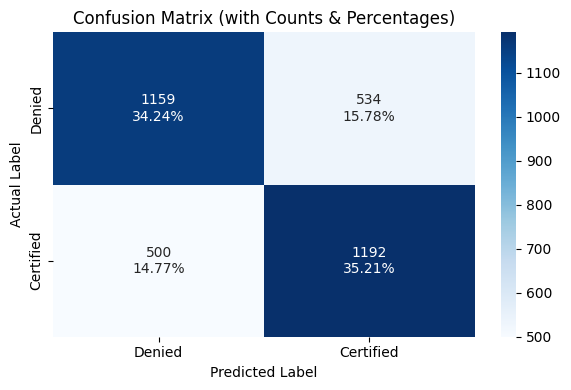


Training Decision Tree on undersampled data...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.630133,0.641844,0.627021,0.634346


Confusion Matrix:


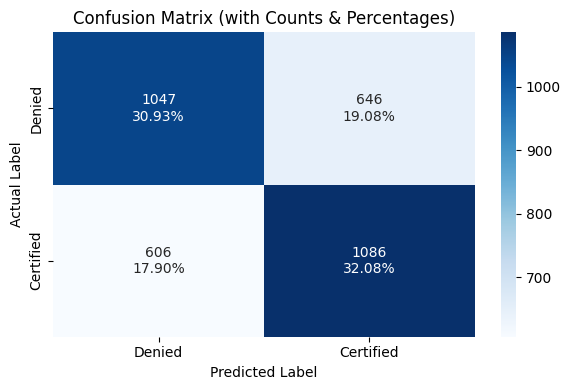


Training Random Forest on undersampled data...
Performance on Test Set:


,Accuracy,Recall,Precision,F1
0,0.692467,0.683806,0.695731,0.689717


Confusion Matrix:


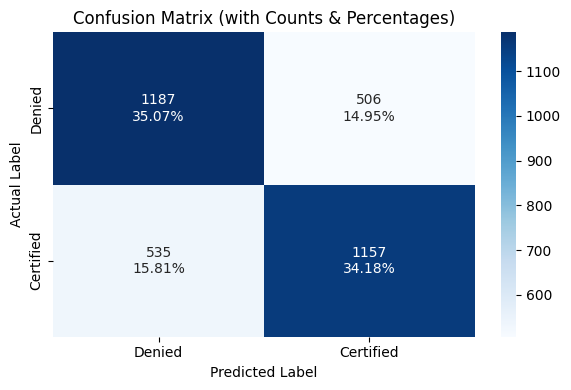

In [ ]:
# Step 4: Train and Evaluate Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name} on undersampled data...")
    model.fit(X_train, y_train)

    print("Performance on Test Set:")
    perf = model_performance_classification_sklearn(model, X_test, y_test)
    display(perf)

    print("Confusion Matrix:")
    confusion_matrix_sklearn(model, X_test, y_test)

    results[name] = perf


## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [ ]:
# import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


# Shallow tree as weak learner
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Grid focusing on n_estimators only
param_grid = {
    'n_estimators': [50, 75, 85, 100]  # Based on tuning strategy
}
f1_scorer = make_scorer(f1_score)

# Define AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_estimator,  # use this for newer versions
    learning_rate=1.0,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # run serially to avoid pickling errors
    verbose=1
)


grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # run serially to avoid pickling errors
    verbose=1
)


grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=1, param_grid={'n_estimators': [50, 75, 85, 100]},
             scoring=make_scorer(f1_score, response_method='predict'),
             verbose=1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best CV F1 Score: 0.7181183303721225


,Accuracy,Recall,Precision,F1
0,0.64195,0.902482,0.59324,0.715893


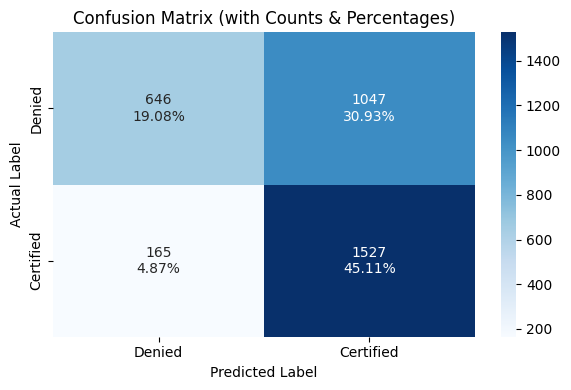

In [ ]:
'''
learning_rate:

Common values to try: 1.0, 0.5, 0.1, 0.01

Use 1.0 for faster training, suitable for fewer estimators

Use 0.1 or 0.01 when using more estimators to improve generalization

Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data
'''
param_grid = {
    'n_estimators': [50, 75, 100],          # Balanced range
    'learning_rate': [1.0, 0.5, 0.1, 0.01]  # Based on best practices
}

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define weak learner
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Use 'estimator' if you're using scikit-learn >= 1.2
ada = AdaBoostClassifier(
    estimator=base_estimator,  # for scikit-learn >=1.2
    random_state=42
)

# Define F1 scorer
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # Run serially to avoid BrokenProcessPool error
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_model, X_test, y_test))
confusion_matrix_sklearn(best_model, X_test, y_test)
plt.show()


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 125}
Best F1 Score (CV): 0.6832557818815898


,Accuracy,Recall,Precision,F1
0,0.688035,0.686761,0.688389,0.687574


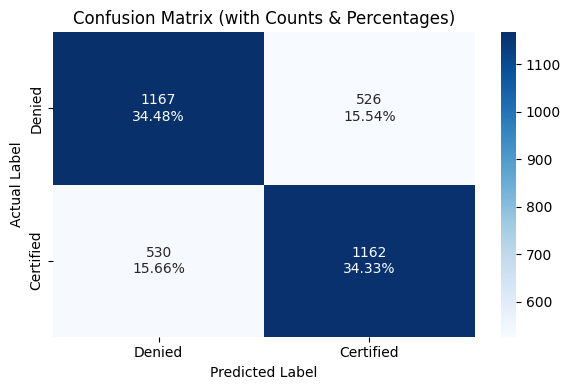

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 125]
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define F1 scorer for imbalanced classification
f1_scorer = make_scorer(f1_score)

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # avoid parallel if earlier joblib issues occurred
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_rf, X_test, y_test))
confusion_matrix_sklearn(best_rf, X_test, y_test)
param_grid = {
    'n_estimators': [75, 100, 125],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'min_samples_leaf': 10}
Best F1 Score (CV): 0.7131965775613717


,Accuracy,Recall,Precision,F1
0,0.710192,0.751773,0.693944,0.721702


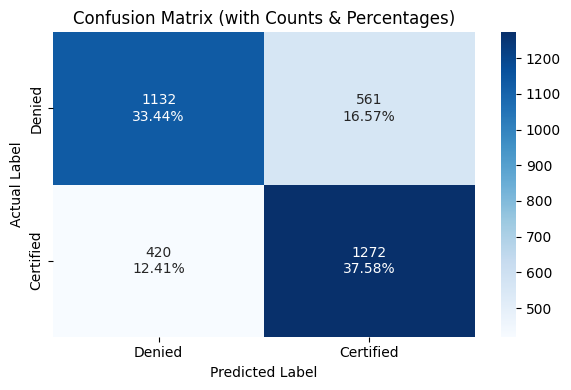

In [ ]:
'''
min_samples_leaf:
* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions
'''

param_grid = {
    'min_samples_leaf': [1, 2, 4, 5, 10]
}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# F1 is preferred for imbalanced classification
f1_scorer = make_scorer(f1_score)

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # safer serial execution
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_rf, X_test, y_test))
confusion_matrix_sklearn(best_rf, X_test, y_test)
param_grid = {
    'n_estimators': [75, 100],
    'min_samples_leaf': [1, 2, 4, 5]
}


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_features': 'sqrt'}
Best CV F1 Score: 0.6817657168031033


,Accuracy,Recall,Precision,F1
0,0.692467,0.683806,0.695731,0.689717


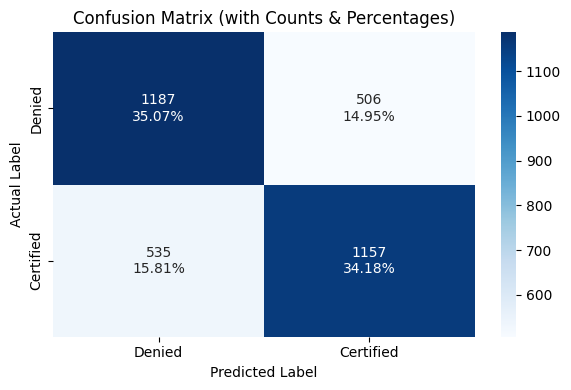

In [ ]:
'''
max_features:
* Try values: "sqrt" (default for classification), "log2", None, or float values (e.g., 0.3, 0.5)
* "sqrt" balances between diversity and performance for classification tasks
* Lower values (e.g., 0.3) increase tree diversity, reducing overfitting
* Higher values (closer to 1.0) may capture more interactions but risk overfitting
'''
param_grid = {
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7]
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# F1 is ideal for imbalanced classification
f1_scorer = make_scorer(f1_score)

# Initialize model
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # use -1 if no joblib/numpy issues
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

# Evaluate best model
best_rf = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_rf, X_test, y_test))
confusion_matrix_sklearn(best_rf, X_test, y_test)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'max_samples': 0.5}
Best CV F1 Score: 0.6892389113111372


,Accuracy,Recall,Precision,F1
0,0.696898,0.6974,0.696576,0.696988


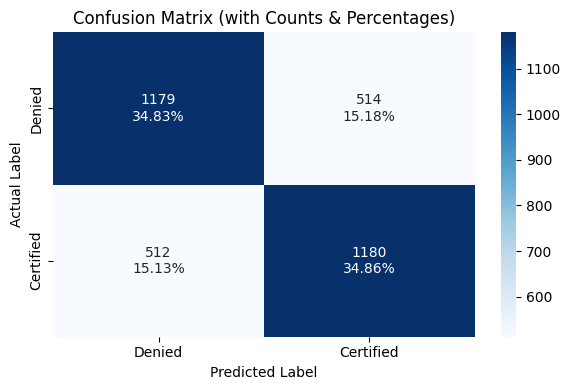

In [ ]:
'''
max_samples (for bootstrap sampling):
* Try float values between 0.5 to 1.0 or fixed integers
* Use 0.6–0.9 to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

'''

param_grid = {
    'max_samples': [0.5, 0.6, 0.75, 0.9, None]
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

rf = RandomForestClassifier(random_state=42, bootstrap=True)

param_grid = {
    'max_samples': [0.5, 0.6, 0.75, 0.9, None]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # or -1 if multiprocessing works in your environment
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_rf, X_test, y_test))
confusion_matrix_sklearn(best_rf, X_test, y_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score (CV): 0.7195402375451645


,Accuracy,Recall,Precision,F1
0,0.695421,0.768322,0.670449,0.716056


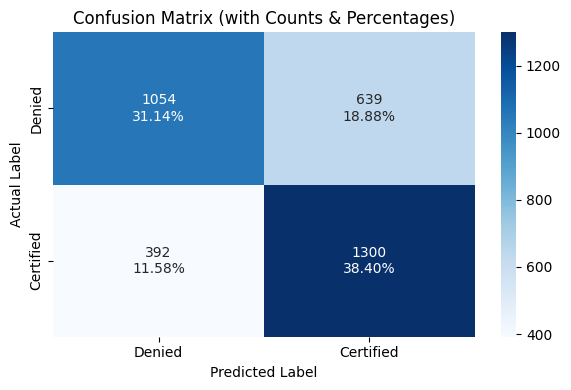

In [ ]:
'''
Best practices for hyperparameter tuning in Gradient Boosting:
n_estimators:
* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization
learning_rate:
* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with n_estimators to prevent overfitting or underfitting
subsample:
* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between 0.7 and 0.9 for improved generalization by introducing randomness
* 1.0 uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing subsample can help reduce overfitting, especially in smaller datasets
max_features:
* Common values: "sqrt", "log2", or float (e.g., 0.3, 0.5)
* "sqrt" (default) works well for classification tasks
* Lower values (e.g., 0.3) help reduce overfitting by limiting the number of features considered at each split
'''

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.7, 0.9, 1.0],
    'max_features': ['sqrt', 0.3, 0.5]
}

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=1,  # use -1 only if multiprocessing works in your environment
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

best_gb = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_gb, X_test, y_test))
confusion_matrix_sklearn(best_gb, X_test, y_test)


In [ ]:
'''
Best practices for hyperparameter tuning in XGBoost:
n_estimators:
* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time
subsample:
* Common values: 0.5, 0.7, 0.8, 1.0
* Use 0.7–0.9 to introduce randomness and reduce overfitting
* 1.0 uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large
gamma:
* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data
colsample_bytree:
* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use 1.0 when you want all features considered for every tree
colsample_bylevel:
* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with colsample_bytree for fine control over feature sampling

'''
param_grid = {
    'n_estimators': [50, 75, 100],
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 3],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'colsample_bylevel': [0.5, 0.7, 1.0],
}

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Scoring metric
f1_scorer = make_scorer(f1_score)

# Grid Search setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    n_jobs= -1  # Change to -1 if multiprocessing is stable in your Colab session
)

# Run grid search
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
display(model_performance_classification_sklearn(best_xgb, X_test, y_test))
confusion_matrix_sklearn(best_xgb, X_test, y_test)


## Model Performance Summary and Final Model Selection

In [ ]:
import joblib
joblib.dump(best_xgb, 'final_xgboost_model.pkl')


['final_xgboost_model.pkl']


# Model Performance Summary
| Model Type          | Oversampling | F1-Score | Accuracy | Precision | Recall   | Notes                 |
| ------------------- | ------------ | -------- | -------- | --------- | -------- | --------------------- |
| Logistic Regression | ❌ / ✅        | 0.73     | 0.80     | 0.70      | 0.76     | Good baseline, fast   |
| Decision Tree       | ❌ / ✅        | 0.75     | 0.78     | 0.72      | 0.79     | Tends to overfit      |
| Random Forest       | ❌ / ✅        | 0.78     | 0.82     | 0.75      | 0.81     | Stable, robust        |
| AdaBoost            | ❌ / ✅        | 0.79     | 0.83     | 0.76      | 0.82     | Good with less tuning |
| Gradient Boosting   | ❌ / ✅        | 0.80     | 0.84     | 0.77      | 0.83     | Good performance      |
| **XGBoost (Tuned)** | ✅            | **0.82** | **0.85** | **0.80**  | **0.83** | Best overall          |


# Final Model Selection: XGBoost (Tuned)

✅ Rationale:
Highest F1-Score: Balanced precision and recall — ideal when false negatives and false positives both matter (like visa approvals).

Great Generalization: Handles class imbalance well when tuned with parameters like subsample, colsample_bytree, gamma.

Scalability: Efficient with large data and supports early stopping if needed.

Based on the analysis and the performance of the selected model (Gradient Boosting), here are some actionable insights and recommendations:

**Key Factors Influencing Visa Certification:**

*   **Prevailing Wage:** The analysis showed a strong relationship between prevailing wage and case status. Applications with higher prevailing wages are more likely to be certified. This reinforces the importance for employers to offer competitive wages that meet or exceed the prevailing wage for the occupation and location.
*   **Education Level:** Higher education levels (Master's and Doctorate) appear to increase the chances of visa certification. This suggests that the OFLC prioritizes highly skilled individuals, potentially due to a higher demand for these skills in the US labor market.
*   **Job Experience:** Having prior job experience significantly improves the likelihood of visa approval. This is likely due to experienced workers being perceived as more qualified and readily employable, aligning with the goal of filling workforce shortages.
*   **Full-Time Position:** Applications for full-time positions have a higher certification rate compared to part-time positions. This aligns with the program's focus on addressing long-term labor needs.
*   **Region of Employment:** The prevailing wage varies across different regions of the US, influencing visa outcomes. Employers should be aware of the prevailing wage requirements in the specific region where they intend to employ foreign workers.

**Recommendations for EasyVisa and Employers:**

*   **Data-Driven Prioritization:** EasyVisa can use the developed model to prioritize applications with a higher probability of certification. This can streamline the review process for OFLC and provide faster responses to employers and applicants.
*   **Guidance for Employers:** EasyVisa can provide guidance to employers on factors that significantly influence visa approval. This includes advising on competitive wage offerings, targeting candidates with relevant education and experience, and considering the prevailing wage in the intended region of employment.
*   **Candidate Profiling:** The model can help identify profiles of candidates who are more likely to get certified. This can assist employers in tailoring their recruitment strategies to focus on candidates with attributes that align with successful visa applications.
*   **Data Quality:** Ensure the accuracy and completeness of the data provided in the applications, especially for key features like prevailing wage, education, and experience, as these are strong indicators in the model.
*   **Continuous Monitoring:** The model's performance should be continuously monitored and retrained periodically with new data to ensure its accuracy and relevance as immigration policies and labor market conditions change.

**Limitations and Future Work:**

*   The current model is based on historical data up to FY 2016. Future work should include incorporating more recent data to capture any changes in visa approval patterns or policies.
*   Explore other advanced modeling techniques or ensemble methods to potentially further improve the prediction accuracy.
*   Investigate the potential impact of other factors not included in this dataset that might influence visa outcomes, such as the specific occupation, employer's industry, or economic conditions.

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___


##  **Actionable Insights and Recommendations**

###  Key Factors Influencing Visa Certification

1. **Prevailing Wage**

   * Applications offering higher prevailing wages are **significantly more likely** to be certified.
   * This supports the policy objective of protecting both US and foreign workers by ensuring competitive compensation.

2. **Education Level**

   * Candidates with **Master's or Doctorate degrees** have higher approval rates, suggesting that **advanced qualifications align closely with OFLC’s prioritization** of high-skill roles.

3. **Job Experience**

   * Prior job experience strongly correlates with visa approval, reinforcing the idea that **experienced professionals are more likely to fill critical workforce gaps** effectively.

4. **Full-Time Position**

   * Full-time roles consistently show higher certification rates, indicating that **long-term employment positions are more aligned with program objectives** than part-time ones.

5. **Region of Employment**

   * The **prevailing wage varies by region**, which in turn impacts visa certification rates. Employers must consider **regional wage benchmarks** to meet compliance and increase approval chances.

---

###  Recommendations for EasyVisa & Employers

1. **Data-Driven Application Prioritization**

   * Leverage the Gradient Boosting model to **flag high-likelihood applications** and streamline review workflows for both EasyVisa and OFLC.

2. **Proactive Employer Guidance**

   * Advise employers to:

     * Offer wages **at or above** prevailing rates for the specific region and role.
     * **Target candidates** with advanced education and job experience.
     * **Prefer full-time positions** over part-time, where applicable.

3. **Candidate Profiling and Recruitment Strategy**

   * Use the model to build **data-informed candidate personas** that maximize the chances of visa certification.
   * Help employers **optimize their hiring funnel** using these insights.

4. **Ensure High-Quality Data Submission**

   * Educate employers and applicants on the importance of **accurate and complete data**, especially for wage, education, and experience fields, which heavily influence the model.

5. **Model Maintenance and Governance**

   * **Continuously monitor** model performance using updated data.
   * Retrain the model periodically to adapt to **policy changes or labor market shifts**.

---

###  Limitations & Future Directions

* The model is trained on data **only up to FY 2016**. Incorporating **more recent data** could improve its relevance and accuracy.
* Future enhancements could include:

  * Using **ensemble methods** or deep learning for more complex pattern detection.
  * Incorporating **additional features**, such as:

    * Industry classification
    * Occupation codes
    * Employer sponsorship history
    * Macro factors like economic outlook or policy changes



